## ROUTE 3 INBOUND 6 PM - 6 AM

In [39]:
import geopandas as gpd 
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json
from shapely.geometry import LineString
import folium

%matplotlib inline

In [3]:
with open('../data/WeGo.json')as start:
         credentials = json.load(start)

In [4]:
Authorization = credentials['Authorization']

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

In [6]:
def concat_frames_columns(geo_response, response, date_range, time_range='6pm-6am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

## In School Months - Jan to May

In [7]:
params1a = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params1b = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [8]:
mfam_jantofeb = concat_frames_columns(requests.get(URL, params = params1a, headers = headers), 
                                      requests.get(URL, params = params1b, headers = headers), "4/27/22-5/25/22")
mfam_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,1.624407,14.661350,4.509,1.941,...,1.341,0.983,182,1.432,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.938144
1,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.291732,10.688423,12.703,3.702,...,1.424,1.130,183,1.571,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.943299
2,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.400021,10.123661,4.407,3.581,...,1.711,1.434,188,1.848,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.969072
3,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.754421,13.460851,5.569,2.181,...,1.401,1.074,159,1.439,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.819588
4,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,3.421409,7.225970,26.647,6.207,...,1.742,0.499,186,1.867,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.958763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,"LINESTRING (-86.79247 36.15442, -86.79222 36.1...",WES17AEN,West End Ave & 17th Ave S Eb,BRO12AEF,Broadway Ave & 12th Ave Eb,24.692,2.274736,10.854886,4.475,2.950,...,1.796,1.437,178,1.911,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.917526
500,"LINESTRING (-86.84759 36.12496, -86.84738 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,4.552357,5.459370,23.520,6.516,...,2.832,2.111,182,3.286,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.938144
501,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.005353,12.163445,3.300,2.624,...,1.575,0.425,184,1.690,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.948454
502,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.239000,7.610682,12.530,5.638,...,1.585,1.138,88,1.815,4/27/22-5/25/22,6pm-6am,m-f,inbound,194,0.453608


In [9]:
 jantofeb = mfam_jantofeb[mfam_jantofeb['percent20Secs'] > np.quantile(mfam_jantofeb['percent20Secs'], .80)]

In [10]:
params2a = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params2b = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [11]:
mfam_febtomar = concat_frames_columns(requests.get(URL, params = params2a, headers = headers), 
                                      requests.get(URL, params = params2b, headers = headers), "4/27/22-5/25/22")
mfam_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.043951,11.871615,4.800,2.844,...,1.516,1.232,41,1.655,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.294964
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.500656,15.870393,3.078,1.724,...,1.254,0.855,90,1.331,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.647482
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,2.062516,12.048876,4.405,3.139,...,1.511,1.209,31,1.546,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.223022
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.453244,9.984739,10.127,4.212,...,1.374,1.168,131,1.563,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.942446
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.237853,10.857282,3.967,3.120,...,1.684,1.431,95,1.774,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.683453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,1.946857,12.528912,3.270,2.528,...,1.491,0.988,133,1.580,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.956835
593,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.500073,15.969889,1.945,1.748,...,1.260,1.178,41,1.347,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.294964
594,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.552000,15.400129,3.776,1.708,...,1.348,1.219,41,1.381,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.294964
595,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.735563,6.599005,43.503,5.385,...,1.598,0.349,64,1.836,4/27/22-5/25/22,6pm-6am,m-f,inbound,139,0.460432


In [13]:
febtomar = mfam_febtomar[mfam_febtomar['percent20Secs'] > np.quantile(mfam_febtomar['percent20Secs'], .80)]

In [14]:
params3a = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params3b = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [15]:
mfam_martoapr = concat_frames_columns(requests.get(URL, params = params3a, headers = headers), 
                                      requests.get(URL, params = params3b, headers = headers), "4/27/22-5/25/22")
mfam_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.626456,14.943534,2.807,2.110,...,1.294,1.236,90,1.401,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.323741
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.358275,10.289300,8.369,3.679,...,1.628,1.293,276,1.717,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.992806
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.500568,16.183872,2.144,1.746,...,1.307,1.190,88,1.337,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.316547
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.253372,11.029249,5.843,3.789,...,1.488,1.333,172,1.601,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.618705
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,5.302418,4.634112,77.886,7.857,...,1.477,0.898,275,1.600,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.989209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.360533,18.186990,1.975,1.717,...,1.131,1.002,90,1.172,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.323741
1105,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.964,1.617832,14.812416,4.069,1.888,...,1.318,0.785,273,1.409,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.982014
1106,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.891,1.722705,13.868306,3.587,2.178,...,1.372,0.930,275,1.458,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.989209
1107,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.723531,8.791161,11.079,4.018,...,1.719,1.233,98,1.868,4/27/22-5/25/22,6pm-6am,m-f,inbound,278,0.352518


In [16]:
martoapr = mfam_martoapr[mfam_martoapr['percent20Secs'] > np.quantile(mfam_martoapr['percent20Secs'], .80)]

In [17]:
params4a = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params4b = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [18]:
mfam_aprtomay = concat_frames_columns(requests.get(URL, params = params4a, headers = headers), 
                                      requests.get(URL, params = params4b, headers = headers), "4/27/22-5/25/22")
mfam_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.557387,15.606269,3.006,1.833,...,1.297,0.742,124,1.364,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.371257
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.361843,10.273757,7.507,3.561,...,1.673,1.274,331,1.778,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.991018
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.438734,16.879423,2.012,1.650,...,1.261,1.084,124,1.309,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.371257
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.261280,10.990678,5.849,3.858,...,1.528,1.291,186,1.663,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.556886
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.353108,3.867713,80.212,15.838,...,1.488,0.773,332,1.622,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.994012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.547821,15.477242,3.383,1.823,...,1.264,0.755,330,1.371,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.988024
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.733133,13.790632,3.821,2.308,...,1.334,1.138,331,1.424,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.991018
1049,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.293877,19.123920,4.585,1.506,...,1.066,0.944,122,1.117,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.365269
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.880294,8.558501,6.681,5.142,...,1.554,1.006,102,1.778,4/27/22-5/25/22,6pm-6am,m-f,inbound,334,0.305389


In [19]:
aprtomay = mfam_aprtomay[mfam_aprtomay['percent20Secs'] > np.quantile(mfam_aprtomay['percent20Secs'], .80)]

<AxesSubplot:>

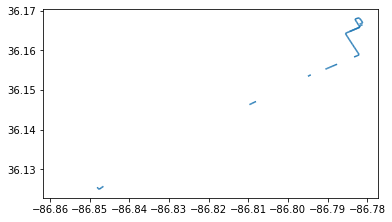

In [33]:
febtomar.plot()

In [35]:
school = pd.concat([jantofeb, febtomar, martoapr, aprtomay], keys = ['jantofeb', 'febtomar', 'martoapr', 'aprtomay'])

<AxesSubplot:>

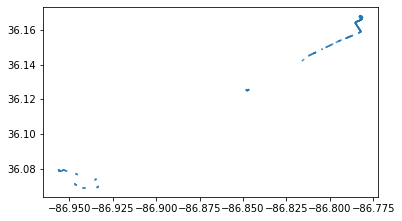

In [36]:
school.plot()

## Summer Months

In [20]:
params5a = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params5b = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [21]:
mfam_maytojun = concat_frames_columns(requests.get(URL, params = params5a, headers = headers), 
                                      requests.get(URL, params = params5b, headers = headers), "4/27/22-5/25/22")
mfam_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.549176,15.688986,3.283,1.872,...,1.254,1.062,131,1.335,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.379710
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.525021,9.609821,46.587,3.471,...,1.619,1.266,341,1.732,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.988406
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.398107,17.369915,2.341,1.557,...,1.243,1.007,131,1.283,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.379710
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.393787,10.382294,9.827,4.264,...,1.524,1.251,188,1.608,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.544928
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,8.075807,3.042668,82.114,30.769,...,1.522,0.828,342,1.674,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.991304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.642504,14.585048,14.110,1.948,...,1.279,0.935,339,1.375,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.982609
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.655241,14.439589,6.401,2.030,...,1.314,1.051,340,1.387,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.985507
1049,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.377581,17.961920,5.784,1.453,...,1.106,0.905,129,1.147,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.373913
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,5.985509,4.118447,348.684,5.141,...,1.551,1.288,112,1.750,4/27/22-5/25/22,6pm-6am,m-f,inbound,345,0.324638


In [22]:
maytojun = mfam_maytojun[mfam_maytojun['percent20Secs'] > np.quantile(mfam_maytojun['percent20Secs'], .80)]

In [23]:
params6a = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '07/04/2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params6b = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '07/04/2022',
    'beginTime': '18:00',
    'endTime': '23:59',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [24]:
mfam_juntojul = concat_frames_columns(requests.get(URL, params = params6a, headers = headers), 
                                      requests.get(URL, params = params6b, headers = headers), "4/27/22-5/25/22")
mfam_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.560450,15.575635,3.379,1.882,...,1.299,0.851,131,1.347,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.378613
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.121924,11.435377,7.263,2.862,...,1.570,1.290,342,1.687,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.988439
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.437985,16.888215,2.166,1.595,...,1.259,1.144,131,1.304,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.378613
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.289770,10.853929,45.927,2.953,...,1.521,1.162,191,1.629,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.552023
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,5.812631,4.227346,75.835,17.685,...,1.456,0.831,344,1.570,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.994220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.380183,17.928057,20.302,1.421,...,1.039,0.833,126,1.096,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.364162
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.528102,15.676964,7.596,1.759,...,1.255,0.816,342,1.325,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.988439
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.585889,15.071042,3.798,1.916,...,1.293,0.625,341,1.372,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.985549
1049,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.143324,7.617096,30.283,5.017,...,1.706,1.323,136,1.880,4/27/22-5/25/22,6pm-6am,m-f,inbound,346,0.393064


In [25]:
juntojul = mfam_juntojul[mfam_juntojul['percent20Secs'] > np.quantile(mfam_juntojul['percent20Secs'], .80)]

In [37]:
summer = pd.concat([maytojun, juntojul], keys=['maytojun', 'juntojul'])

<AxesSubplot:>

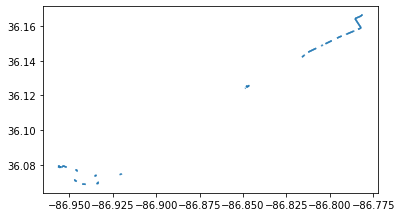

In [38]:
summer.plot()

In [41]:
mapdawg = folium.Map(location = [36.19, -86.7775], zoom_start = 12)
r3oischool = school['geometry'].to_json()
r3oisummer = summer['geometry'].to_json()

In [43]:
style1 = {'color' : 'red', 'weight' : 6}
style2 = {'color' : 'blue', 'weight' : 3}
folium.GeoJson(r3oischool, style_function =lambda x:style1).add_to(mapdawg)
folium.GeoJson(r3oisummer, style_function = lambda x:style2).add_to(mapdawg)
mapdawg